In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv('gas_turbines.csv')
data.shape

(15039, 11)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
for column in ['AT', 'AP', 'AH', 'AFDP','GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX']:
    data[column]=scaler.fit_transform(data[[column]])
    
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,114.70,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,114.72,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,114.71,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,114.72,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,114.72,0.136692,0.073647,0.592087


In [63]:
X=data.drop('TEY',axis=1)
y=data['TEY']

X_train.head()
y_train.head()

9126     140.01
11883    148.93
14619    121.22
2203     133.35
6205     128.17
Name: TEY, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=100)

In [64]:
X_train.shape

(12031, 10)

In [75]:
model=tf.keras.Sequential([
       tf.keras.layers.Dense(64,input_dim=10,activation='linear'),
       tf.keras.layers.Dense(64,activation='linear'),
       tf.keras.layers.Dense(1)
])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adadelta(learning_rate=.001),metrics=['mean_absolute_error'])


In [76]:
histoey=model.fit(X_train,y_train,epochs=30,batch_size=10,validation_split=.2)

Epoch 1/30
963/963 [==============================] - 4s 3ms/step - loss: 132.8064 - mean_absolute_error: 132.8064 - val_loss: 132.9751 - val_mean_absolute_error: 132.9751
Epoch 2/30
963/963 [==============================] - 3s 3ms/step - loss: 132.2065 - mean_absolute_error: 132.2065 - val_loss: 132.2459 - val_mean_absolute_error: 132.2459
Epoch 3/30
963/963 [==============================] - 3s 3ms/step - loss: 131.3190 - mean_absolute_error: 131.3190 - val_loss: 131.1696 - val_mean_absolute_error: 131.1696
Epoch 4/30
963/963 [==============================] - 3s 3ms/step - loss: 129.9493 - mean_absolute_error: 129.9493 - val_loss: 129.4206 - val_mean_absolute_error: 129.4206
Epoch 5/30
963/963 [==============================] - 3s 3ms/step - loss: 127.5189 - mean_absolute_error: 127.5189 - val_loss: 126.0487 - val_mean_absolute_error: 126.0487
Epoch 6/30
963/963 [==============================] - 3s 3ms/step - loss: 122.1995 - mean_absolute_error: 122.1995 - val_loss: 117.8152 - va

<Axes: >

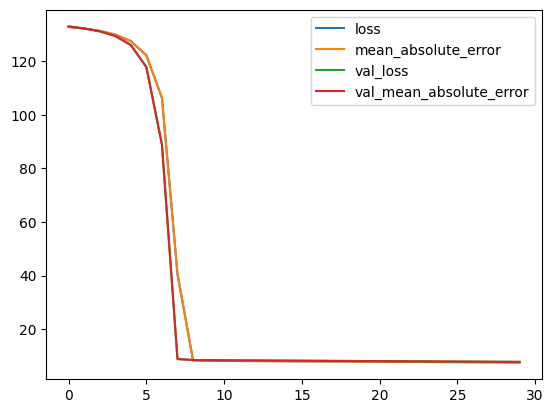

In [77]:
pd.DataFrame(histoey.history).plot()